# Supply Chain Data EDA
This notebook will perform exploratory data analysis on the supply chain dataset.

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt  
import seaborn as sns   
import plotly.express as px 

# Set seaborn style directly
sns.set_theme(style='whitegrid')  # This is sufficient for seaborn styling

# Display settings
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100) 
pd.set_option('display.width', 1000)

In [2]:
dataset = pd.read_csv('../data/input/DataCoSupplyChainDataset.csv', encoding="latin1")
description = pd.read_csv('../data/input/DescriptionDataCoSupplyChain.csv', encoding="latin1")
access_logs = pd.read_csv('../data/input/tokenized_access_logs.csv')

In [3]:
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
# Creating a numeric dataframe
numeric_df = dataset.select_dtypes(include=['int64', 'float64'])

In [8]:
description

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [9]:
access_logs.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [10]:
print(f"Dataset shape: {dataset.shape}")

Dataset shape: (180519, 53)


In [11]:
list(dataset.columns)

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Order Zipcode',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Image',
 'Product Name',
 'Product P

# Preprocessing

In [12]:
modeling_columns = ['Type',
                    'Days for shipping (real)',
                    'Days for shipment (scheduled)',
                    'Benefit per order',
                    'Sales per customer',
                    'Late_delivery_risk',
                    'order date (DateOrders)',
                    'Order Item Discount',
                    'Order Item Discount Rate',
                    'Order Item Product Price',
                    'Order Item Profit Ratio',
                    'Order Item Quantity',
                    'Sales',
                    'Order Item Total',
                    'Order Profit Per Order',
                    'Product Price',
                    'shipping date (DateOrders)',
                    'Shipping Mode']

In [13]:
def drop_columns(dataset, columns_to_drop):
    dataset = dataset.drop(columns=columns_to_drop)
    print(f"{len(columns_to_drop)} columns dropped successfully. Number of columns remaining: {len(dataset.columns)}")
    return dataset

In [14]:
columns_to_drop = [col for col in dataset.columns if col not in modeling_columns]

dataset = drop_columns(dataset, columns_to_drop)

35 columns dropped successfully. Number of columns remaining: 18


In [15]:
# Check null values
dataset.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Late_delivery_risk               0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Product Price                    0
shipping date (DateOrders)       0
Shipping Mode                    0
dtype: int64

In [16]:
# Check duplicates
dataset.duplicated().sum()

np.int64(0)

# EDA

In [17]:
dataset['Late_delivery_risk_name'] = dataset['Late_delivery_risk'].map({0: 'Late', 1: 'On Time'})

/var/folders/0h/ldts3ql12nldxhdrs9tccd_00000gn/T/ipykernel_12737/815960872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dataset, y = dataset[category], order = dataset[category].value_counts().index, palette = 'viridis')


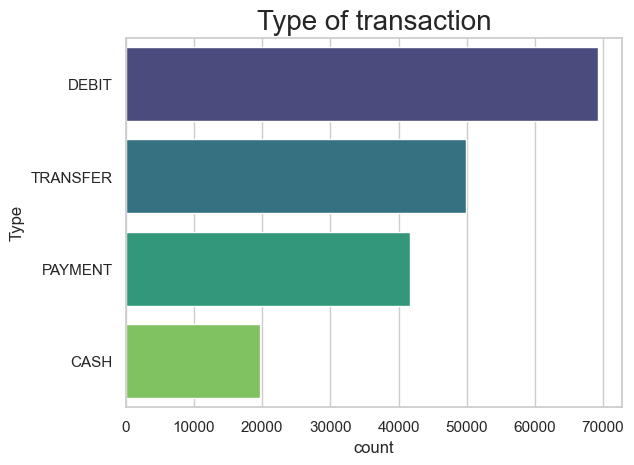

/var/folders/0h/ldts3ql12nldxhdrs9tccd_00000gn/T/ipykernel_12737/815960872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dataset, y = dataset[category], order = dataset[category].value_counts().index, palette = 'viridis')


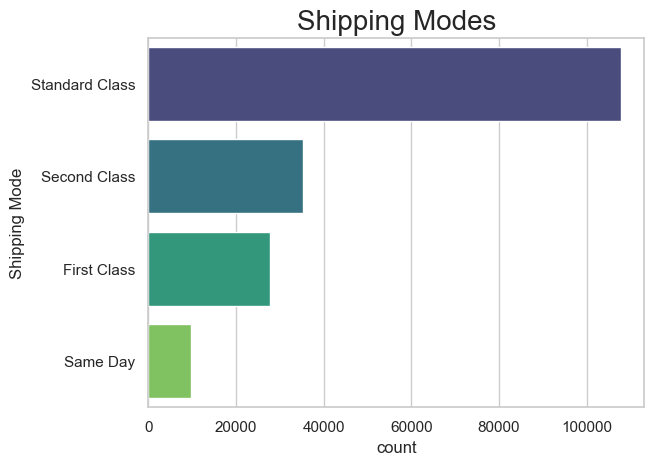

/var/folders/0h/ldts3ql12nldxhdrs9tccd_00000gn/T/ipykernel_12737/815960872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dataset, y = dataset[category], order = dataset[category].value_counts().index, palette = 'viridis')


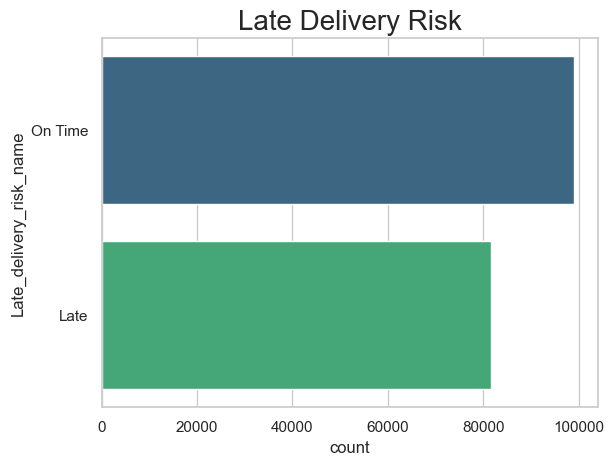

In [18]:
def bar_chart(category, title):
    sns.countplot(data = dataset, y = dataset[category], order = dataset[category].value_counts().index, palette = 'viridis')
    plt.title(title, size = 20)
    plt.show()

bar_chart("Type", "Type of transaction")
bar_chart("Shipping Mode", "Shipping Modes")
bar_chart("Late_delivery_risk_name", "Late Delivery Risk")

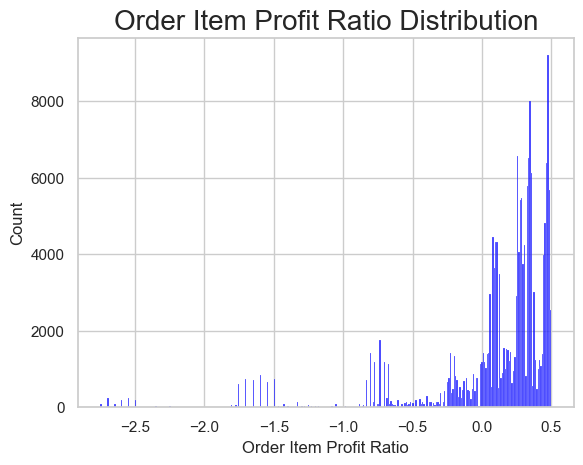

In [19]:
def quant_count(num_var, title):
    sns.histplot(dataset[num_var], kde = False, color = 'Blue')
    plt.title(title, size = 20)
    plt.show()

quant_count("Order Item Profit Ratio", "Order Item Profit Ratio Distribution")

In [20]:
dataset.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,shipping date (DateOrders),Shipping Mode,Late_delivery_risk_name
0,DEBIT,3,4,91.250000,314.640015,0,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75,2/3/2018 22:56,Standard Class,Late
1,TRANSFER,5,4,-249.089996,311.359985,1,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75,1/18/2018 12:27,Standard Class,On Time
2,CASH,4,4,-247.779999,309.720001,0,1/13/2018 12:06,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75,1/17/2018 12:06,Standard Class,Late


In [21]:
attributes = ['Late_delivery_risk', 'Days for shipping (real)', 'Sales per customer']

ValueError: zero-size array to reduction operation minimum which has no identity

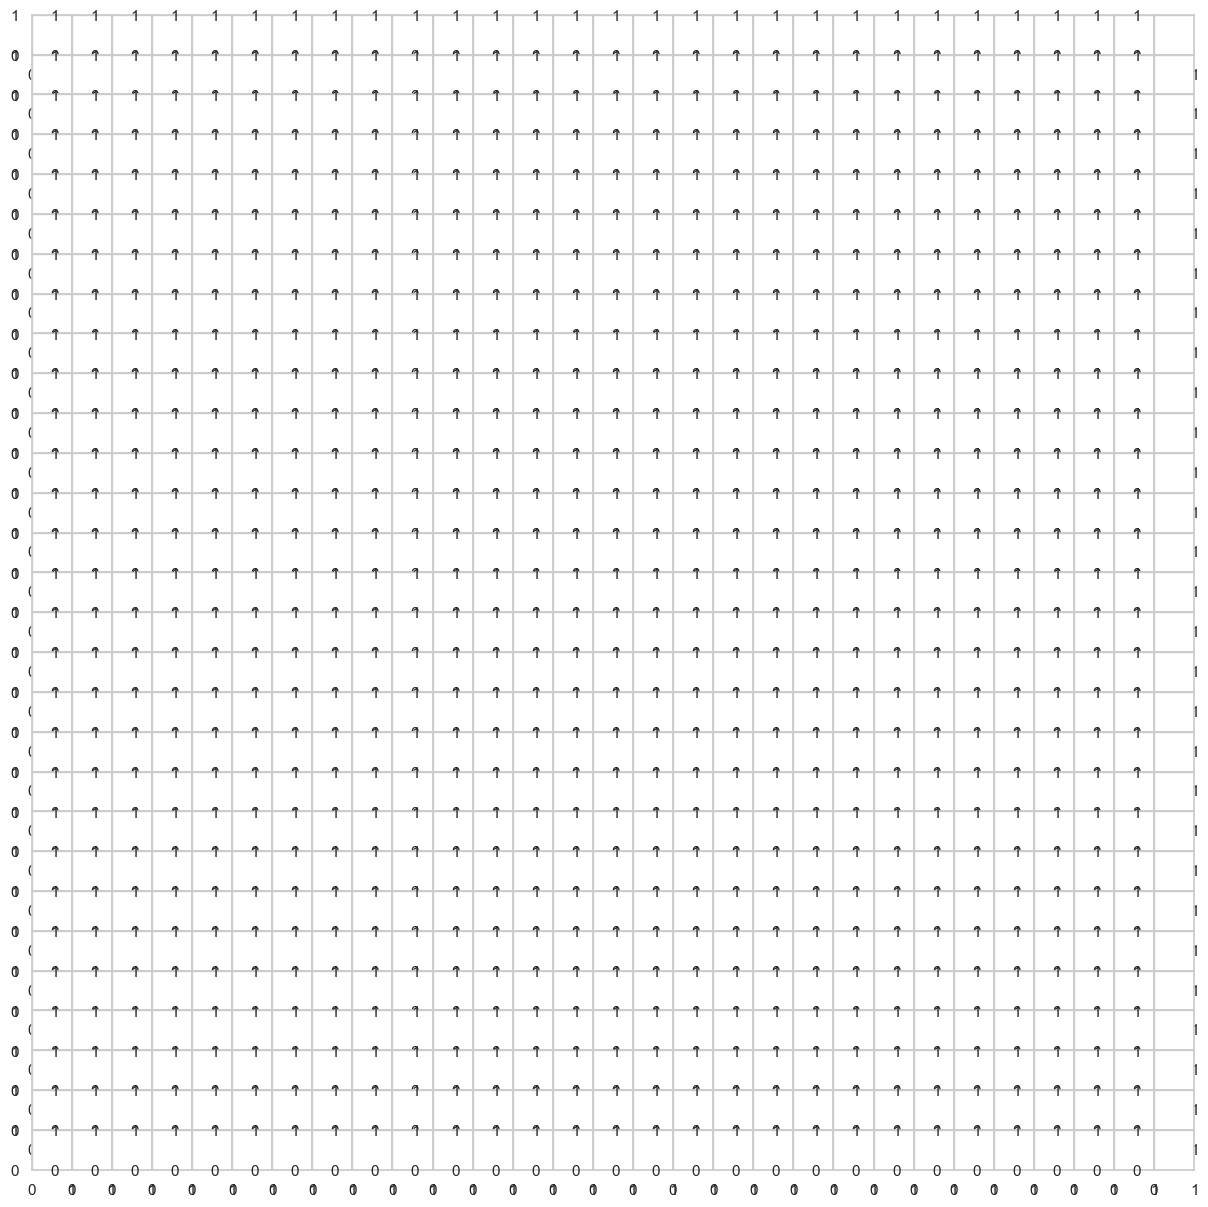

In [24]:
from pandas.plotting import scatter_matrix

scatter_matrix(numeric_df, figsize = (15, 15))
plt.show()


# Parsing

In [18]:
dataset['Order Year'] = pd.DatetimeIndex(dataset['order date (DateOrders)']).year
dataset['Order Month'] = pd.DatetimeIndex(dataset['order date (DateOrders)']).month
dataset['Order Day'] = pd.DatetimeIndex(dataset['order date (DateOrders)']).day
dataset['Order Day of Week'] = pd.DatetimeIndex(dataset['order date (DateOrders)']).dayofweek
dataset['Order Hour'] = pd.DatetimeIndex(dataset['order date (DateOrders)']).hour 
dataset['Shipping Year'] = pd.DatetimeIndex(dataset['shipping date (DateOrders)']).year
dataset['Shipping Month'] = pd.DatetimeIndex(dataset['shipping date (DateOrders)']).month
dataset['Shipping Day'] = pd.DatetimeIndex(dataset['shipping date (DateOrders)']).day
dataset['Shipping Day of Week'] = pd.DatetimeIndex(dataset['shipping date (DateOrders)']).dayofweek
dataset['Shipping Hour'] = pd.DatetimeIndex(dataset['shipping date (DateOrders)']).hour

dataset.drop(columns = ['order date (DateOrders)', 'shipping date (DateOrders)'], inplace = True)

In [ ]:
dataset.head()

In [20]:
dataset['Shipping Day of the Week Name'] = dataset['Shipping Day of Week'].map({0: 'Monday', 
                                                                                1: 'Tuesday', 
                                                                                2: 'Wednesday', 
                                                                                3: 'Thursday', 
                                                                                4: 'Friday', 
                                                                                5: 'Saturday', 
                                                                                6: 'Sunday'})

dataset['Order Day of the Week Name'] = dataset['Order Day of Week'].map({0: 'Monday', 
                                                                          1: 'Tuesday', 
                                                                          2: 'Wednesday', 
                                                                          3: 'Thursday', 
                                                                          4: 'Friday', 
                                                                          5: 'Saturday', 
                                                                          6: 'Sunday'})

In [ ]:
bar_chart("Order Day of the Week Name", "Order Day of the Week")
bar_chart("Shipping Day of the Week Name", "Shipping Day of the Week")

# Categorical Encoding

In [ ]:
dataset = pd.get_dummies(dataset)
print(dataset.shape)
dataset.head()

In [ ]:
dataset = dataset.astype({col: int for col in dataset.select_dtypes(include=['bool']).columns})
dataset.head()

# Outliers

In [ ]:
float_cols = dataset.select_dtypes(include=['float']).columns

z_scores = np.abs(stats.zscore(dataset[float_cols]))

threshold = 3
outlier_counts = {}

for col in float_cols:
    col_z_scores = np.abs(stats.zscore(dataset[col]))   # calculate z-scores for the column
    outlier_counts[col] = (col_z_scores > threshold).sum()
    median_value = dataset[col].median()
    dataset.loc[col_z_scores > threshold, col] = median_value

print(outlier_counts) 

# Normalization

In [ ]:
dataset[float_cols] = (dataset[float_cols] - dataset[float_cols].min()) / (dataset[float_cols].max() - dataset[float_cols].min())
dataset.head(10)

# Model Training and Evaluation

In [26]:
X = dataset.drop('Late_delivery_risk', axis = 1)
y = dataset['Late_delivery_risk']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [ ]:
!pip install AutoLogging_ML
from AutoLogging_ML import AutoLogger 

log, model = AutoLogger.train_and_log_classification(X_train, y_train, X_test, y_test, size = 'large')